# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



Ingrese la velocidad de la moto: 13
Ingrese la aceleración del policía: 5
El tiempo en el cual se encuentran ambos es:  5.2


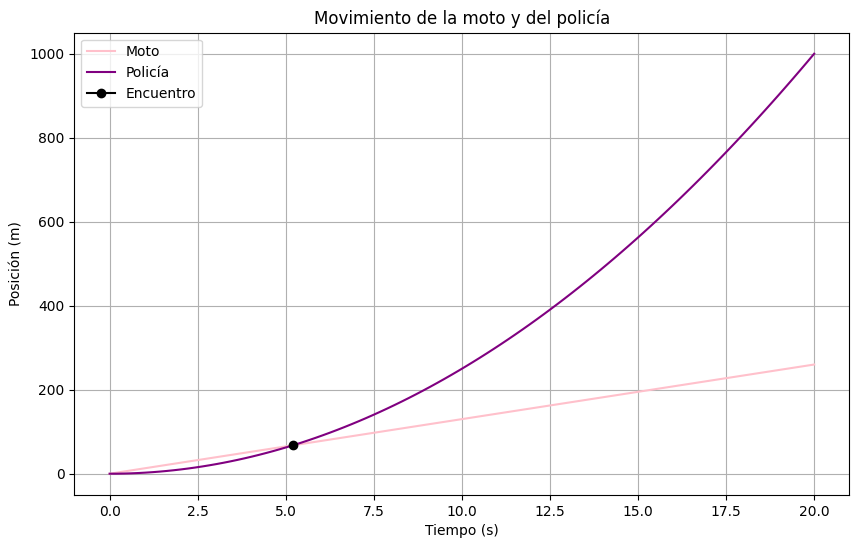

In [ ]:
1import numpy as np
import matplotlib.pyplot as plt
v_m = float(input("Ingrese la velocidad de la moto: ")) #solicita al usuario la velocidad de la moto y la aceleración del policía
a_p = float(input("Ingrese la aceleración del policía: "))
x_i = 0 #posición inicial de ambos (moto y policía)
t = np.linspace(0, 20, 100) #crea un arreglo de tiempo desde 0 hasta 20 segundos, con 100 puntos uniformemente espaciados
x_m = x_i + v_m*t #calcula la posición de la mot0
x_p = x_i  + 0.5*a_p*t**2 #calcula la posición del policia
t_encuentro = 2*v_m / a_p #calcula el tiempo en que el policía alcanza a la moto

print("El tiempo en el cual se encuentran ambos es: ", t_encuentro)

plt.figure(figsize=(10,6))
plt.plot(t, x_m, label='Moto', color='pink' )
plt.plot(t, x_p, label='Policía', color='purple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.plot(t_encuentro, v_m*t_encuentro, marker='o', color='black', label='Encuentro')
plt.title('Movimiento de la moto y del policía')
plt.grid(True)
plt.legend()
plt.show()


---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/6}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/6}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#para el iteam a:
def L_j(epsilon, Sigma, r):
   return 4*epsilon*(((Sigma/r)**12)-((Sigma/r)**6))

1.121212121212121


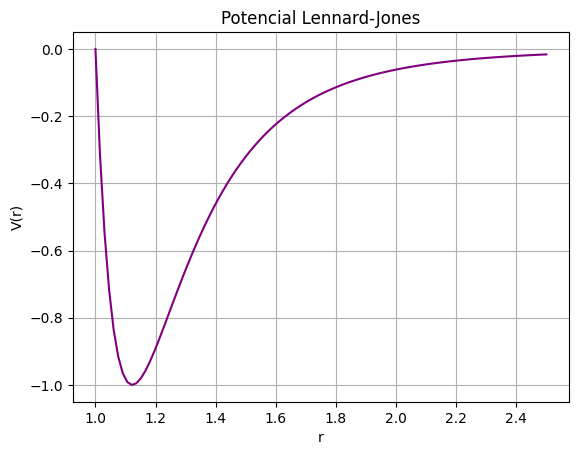

In [ ]:
#para el item b:
sigma = 1
epsilon = 1
r = np.linspace(1, 2.5*sigma, 100)
V = L_j(epsilon, sigma, r)
minimo = np.argmin(V)
print(r[minimo])

2**(1/6)*sigma

#print(r[minimo]) = 1.121212121212121 podemos observar en la grafica que efectivamente la distancia
#2**(1/6)*sigma = 1.122462048309373 de equilibrio con sigma=epsilon=1, es aproximadamente 2**(1/6)*sigma

plt.plot(r, V, color = 'purple')
plt.xlabel('r')
plt.ylabel('V(r)')
plt.title('Potencial Lennard-Jones')
plt.grid(True)
plt.show()

Para sigma = 0.5
  r_m (numérico) = 0.5603015075376885
  r_m (teórico)  = 0.5612310241546865

Para sigma = 1.0
  r_m (numérico) = 1.120603015075377
  r_m (teórico)  = 1.122462048309373

Para sigma = 1.5
  r_m (numérico) = 1.6809045226130652
  r_m (teórico)  = 1.6836930724640595

Para sigma = 2.0
  r_m (numérico) = 2.241206030150754
  r_m (teórico)  = 2.244924096618746



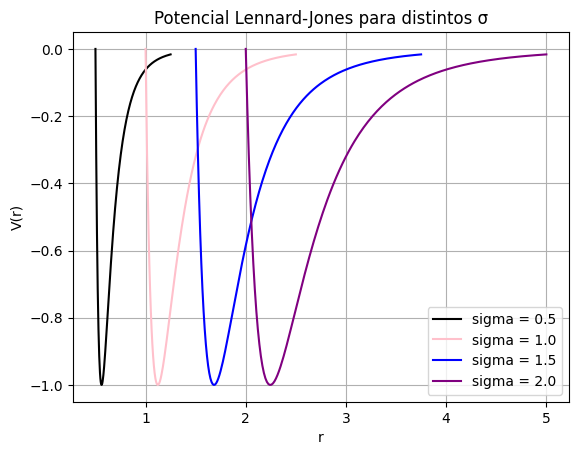

In [ ]:
#para el item c:
epsilon = 1 #epsilon constante
sigmas = [0.5, 1.0, 1.5, 2.0] #diferentes valores para sigma
colores = ['black', 'pink', 'blue', 'purple']

plt.figure() #creamos el gráfico

for i, sigma in enumerate(sigmas): #realizamos el procedimiento del item b
    r = np.linspace(1*sigma, 2.5*sigma, 200) #en un for para que se realice a cada valor
    V = L_j(epsilon, sigma, r)
    minimo = np.argmin(V)
    r_m = r[minimo]
    r_t = 2**(1/6)*sigma

    print("Para sigma =", sigma)
    print("  r_m (numérico) =", r_m)
    print("  r_m (teórico)  =", r_t)
    print()

    plt.plot(r, V, label='sigma = ' + str(sigma), color=colores[i]) #para graficar distintos sigma


plt.xlabel('r')
plt.ylabel('V(r)')
plt.title('Potencial Lennard-Jones para distintos σ')
plt.grid(True)
plt.legend()
plt.show()

#podemos ver que los valores de la distancia de equilibrio son aproximadas

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


In [ ]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

# para el item a
columnas_nuevas = [] #creamos una lista vacia
for col in alturas:
    if "(in)" not in col: #se recorren las columnas, si no tienen 'in' en su nombre se agrega a la lista
        columnas_nuevas.append(col)

alturas = alturas[columnas_nuevas]  #columnas útiles

#renombramos las columnas
alt = alturas.rename(columns={"Country": "País", "Average Height, Boys, 19 yo (cm)↓": "Niños 19 años", "Girls 19 (cm)": "Niñas 19 años"})

alt = alt.dropna(axis=1)
alt = alt.drop(alt.index[-1])
alt


,País,Niños 19 años,Niñas 19 años
0,Netherlands,184,170
1,Montenegro,183,170
2,Estonia,183,169
3,Bosnia and Herzegovina,182,167
4,Iceland,182,169
...,...,...,...
190,Mozambique,164,155
191,Papua New Guinea,163,157
192,Solomon Islands,163,157
193,Laos,163,153


In [ ]:
#para el item b
#tomando los 10 menores y 10 mayores
menores_hombres = alt.tail(10)
mayores_hombres = alt.head(10)

#agregamos a Colombia:
colombia = alt.loc[alturas["Country"] == "Colombia"]

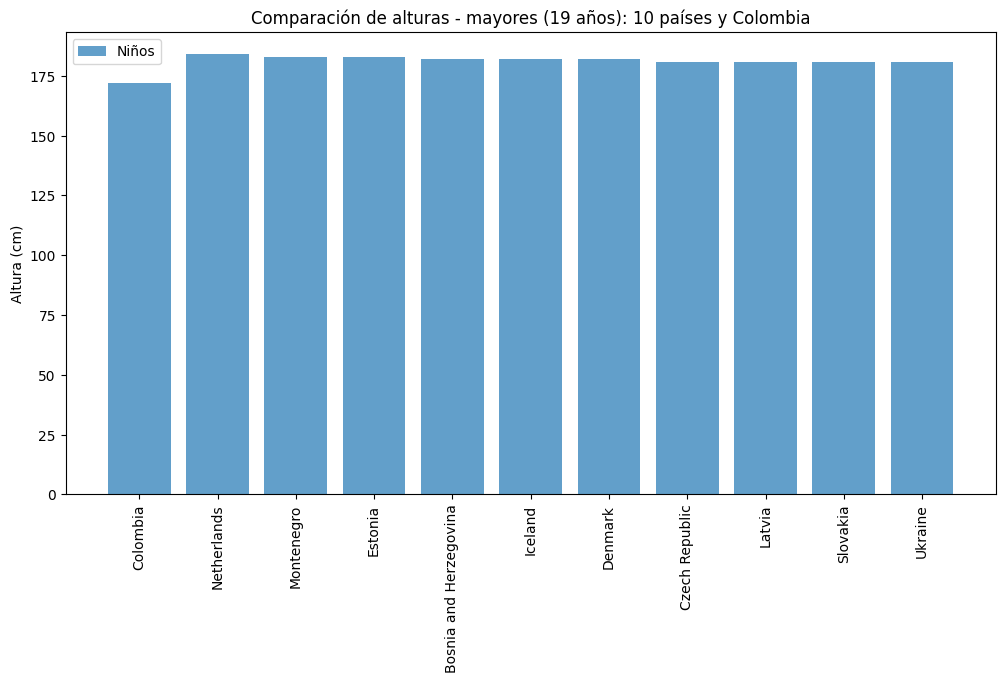

In [ ]:
#organizamos los datos para realizar los graficos
#para los hombres mayores
#alturas.tail() tiene de ultimo total
datos_grafico_hombres_mayores = pd.concat([colombia, mayores_hombres])
plt.figure(figsize=(12, 6))
plt.bar(datos_grafico_hombres_mayores["País"], datos_grafico_hombres_mayores["Niños 19 años"], label="Niños", alpha=0.7)

plt.xticks(rotation=90)
plt.ylabel("Altura (cm)")
plt.title("Comparación de alturas - mayores (19 años): 10 países y Colombia")
plt.legend()
plt.show()

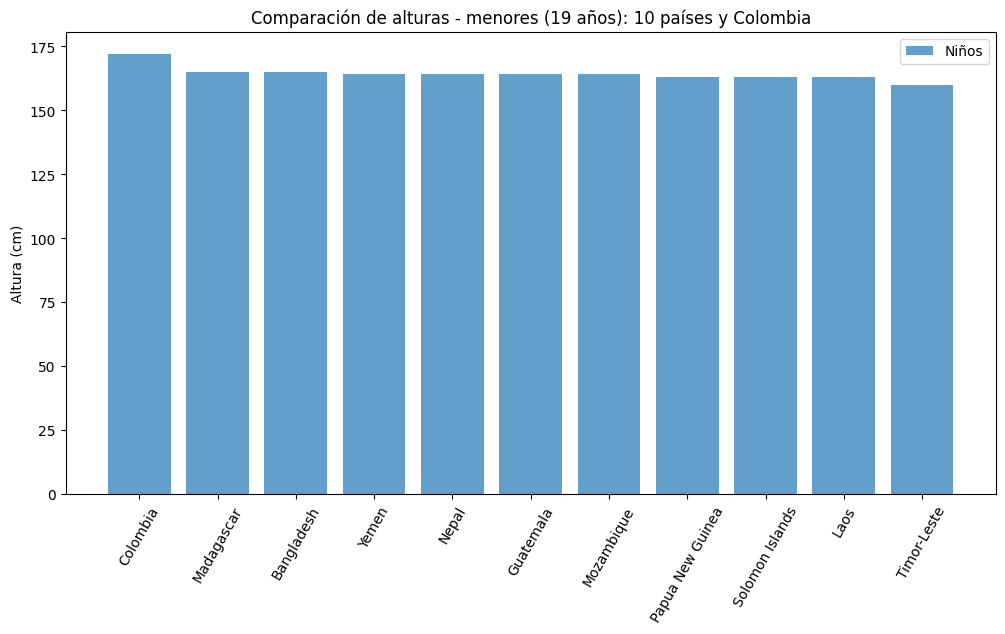

In [ ]:
#para los hombres menores
datos_grafico_hombres_menores = pd.concat([ colombia, menores_hombres])
plt.figure(figsize=(12, 6))
plt.bar(datos_grafico_hombres_menores["País"], datos_grafico_hombres_menores["Niños 19 años"], label="Niños", alpha=0.7)

plt.xticks(rotation=60)
plt.ylabel("Altura (cm)")
plt.title("Comparación de alturas - menores (19 años): 10 países y Colombia")
plt.legend()
plt.show()


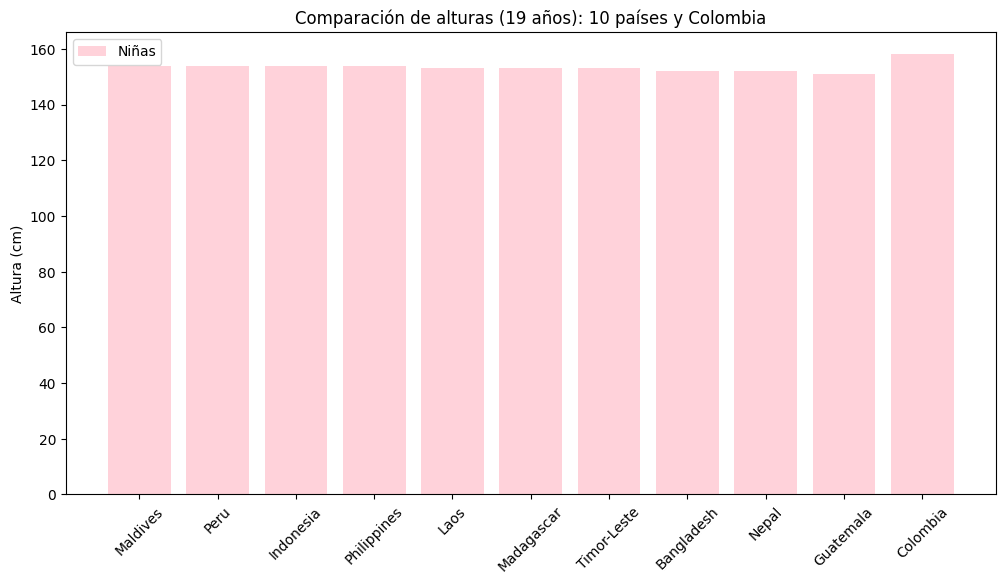

In [ ]:
mujeres = alt.sort_values(by='Niñas 19 años', ascending=False)
menores_mujeres = mujeres.tail(10)
mayores_mujeres = mujeres.head(10)
datos_grafico_mujeres_menores = pd.concat([menores_mujeres, colombia])
plt.figure(figsize=(12, 6))
plt.bar(datos_grafico_mujeres_menores["País"], datos_grafico_mujeres_menores["Niñas 19 años"], label="Niñas", color = 'pink', alpha=0.7)

plt.xticks(rotation=45)
plt.ylabel("Altura (cm)")
plt.title("Comparación de alturas (19 años): 10 países y Colombia")
plt.legend()
plt.show()


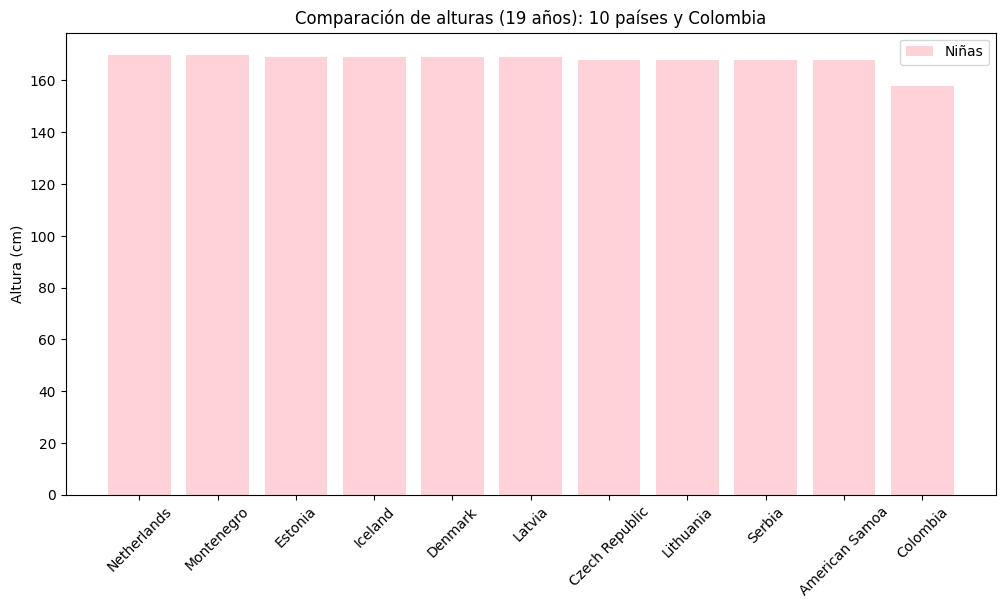

In [ ]:
datos_grafico_mujeres_mayores = pd.concat([mayores_mujeres, colombia])
plt.figure(figsize=(12, 6))
plt.bar(datos_grafico_mujeres_mayores["País"], datos_grafico_mujeres_mayores["Niñas 19 años"], label="Niñas", color = 'pink', alpha=0.7)

plt.xticks(rotation=45)
plt.ylabel("Altura (cm)")
plt.title("Comparación de alturas (19 años): 10 países y Colombia")
plt.legend()
plt.show()

In [ ]:
#para el item c:
ingresos = income.rename(columns = {'Country': 'País'}) #cambiamos el nombre de la columna en el segundo DataFrame

In [ ]:
merged_df = pd.merge(alt, ingresos, on='País', how='inner') #hacemos un merge con ambos DataFrame
merged_df['GDP per Adult 2022'] = merged_df['GDP per Adult 2022'].str.replace('$', '').str.replace(',', '') #convertimos los datos de la columna a float
merged_df['GDP per Adult 2022'] = merged_df['GDP per Adult 2022'].astype(float)
merged_df.head()

,País,Niños 19 años,Niñas 19 años,Unnamed: 0,Wealth per Adult 2022↓,GDP per Adult 2022,Total Wealth 2022,Share of World Wealth 2022
0,Netherlands,184,170,NaN,"$358,235",73996.0,$4.9T,1.1%
1,Montenegro,183,170,NaN,"$81,900",12830.0,$39B,NaN
2,Estonia,183,169,NaN,"$78,777",37294.0,$82B,NaN
3,Bosnia and Herzegovina,182,167,NaN,"$33,593",9702.0,$88B,NaN
4,Iceland,182,169,NaN,"$498,290",102597.0,$129B,NaN


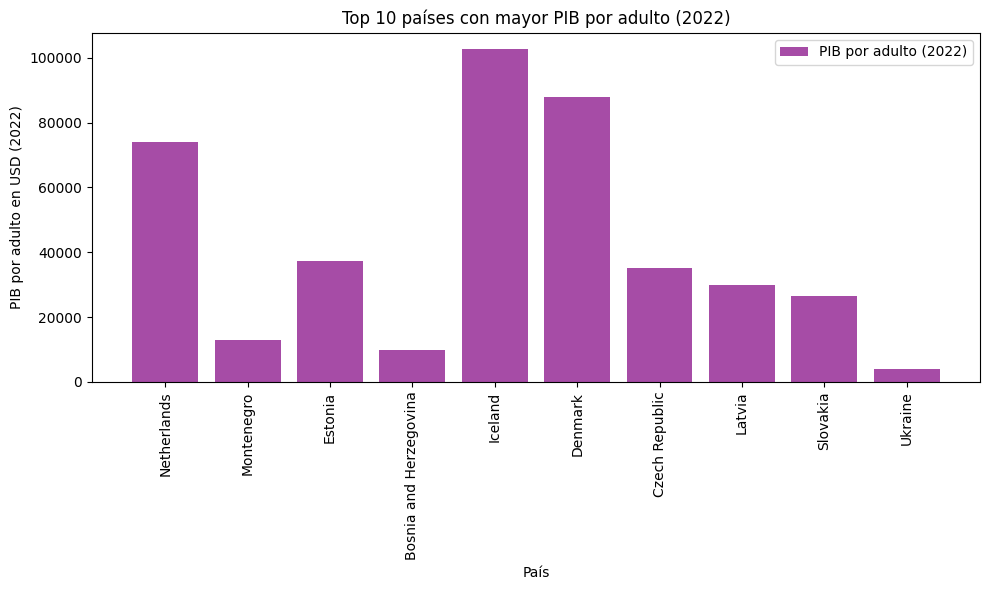

In [ ]:
#realizamos el grafico
mayor_ingreso = merged_df.head(10)

plt.figure(figsize=(10, 6))
plt.bar(mayor_ingreso["País"], mayor_ingreso['GDP per Adult 2022'],
        label="PIB por adulto (2022)", color='purple', alpha=0.7)

plt.xlabel("País")
plt.ylabel("PIB por adulto en USD (2022)")
plt.title("Top 10 países con mayor PIB por adulto (2022)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

#podemos observar que no hay una relacion directa entre la riqueza y la altura, las variables se relacionan de una manera aleatoria